In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
d = pd.read_csv('../tables/2024_03_11_merged_03.csv', parse_dates=['Time_Mid'])
d['CO_ppm'].describe()

count    13082.000000
mean         0.118462
std          0.024820
min          0.061900
25%          0.100650
50%          0.121100
75%          0.136000
max          0.255300
Name: CO_ppm, dtype: float64

In [4]:
transit_flights = [pd.Timestamp('2022-03-22').date(), pd.Timestamp('2022-05-18').date(), pd.Timestamp('2022-05-21').date(), pd.Timestamp('2022-05-31').date(), pd.Timestamp('2022-06-18').date()]
d = d[d['Time_Mid'].dt.month.isin([8, 9]) & (~d['Time_Mid'].dt.date.isin(transit_flights))]

In [11]:
d[d['CCN_n_pred'] / d['N_CCN_stdPT'] > 3]['CO_ppm'].describe()

count    66.000000
mean      0.135130
std       0.014856
min       0.080100
25%       0.128475
50%       0.137450
75%       0.145375
max       0.162800
Name: CO_ppm, dtype: float64

In [13]:
d[d['CCN_n_pred'] / d['N_CCN_stdPT'] > 4]

,Unnamed: 0.1,level_0,Unnamed: 0,index,Time_Mid,SMPS_Bin01,SMPS_Bin02,SMPS_Bin03,SMPS_Bin04,SMPS_Bin05,...,ams_tot,D_a,k_obs,D_c,CCN_n_pred,non_org,Org_vc,non_org_vc,ams_tot_vc,k
2119,2119,2952,3878,3878,2020-08-21 14:02:27.500,NaN,NaN,NaN,NaN,NaN,...,12.956,291.846449,0.011252,96.145525,1004.434592,5.713,0.005174,0.004081,0.009254,0.344887
2126,2126,2962,3893,3893,2020-08-21 14:17:27.500,NaN,NaN,0.0,0.0,0.0,...,4.762,216.339278,0.013581,82.951713,332.862680,1.374,0.002420,0.000981,0.003401,0.267152
2128,2128,2966,3897,3897,2020-08-21 14:21:27.500,NaN,0.0,0.0,0.0,0.0,...,7.067,193.751477,0.007241,61.026593,871.726456,2.469,0.003284,0.001764,0.005048,0.298179
2130,2130,2968,3901,3901,2020-08-21 14:26:27.500,0.0,0.0,0.0,0.0,0.0,...,10.216,256.293119,0.013176,89.638294,991.369470,4.331,0.004204,0.003094,0.007297,0.336211
2132,2132,2970,3903,3903,2020-08-21 14:28:27.500,NaN,0.0,0.0,0.0,0.0,...,9.435,208.228110,0.017673,81.268090,918.832545,3.720,0.004082,0.002657,0.006739,0.321081
2133,2133,2971,3905,3905,2020-08-21 14:30:27.500,NaN,0.0,0.0,0.0,0.0,...,8.798,188.831334,0.015526,70.118921,1081.910613,3.736,0.003616,0.002669,0.006284,0.336567
2136,2136,2976,3910,3910,2020-08-21 14:35:27.500,0.0,0.0,0.0,0.0,0.0,...,9.823,223.184392,0.043184,113.113121,765.167731,4.198,0.004018,0.002999,0.007016,0.337956
2138,2138,2978,3912,3912,2020-08-21 14:37:27.500,NaN,0.0,0.0,0.0,0.0,...,8.805,203.441513,0.035358,96.549116,897.953593,3.808,0.003569,0.002720,0.006289,0.340566
2324,2324,3229,4266,4266,2020-08-26 14:13:36.500,NaN,NaN,0.0,0.0,0.0,...,17.424,NaN,NaN,55.608428,1608.451431,6.131,0.008066,0.004379,0.012446,0.299454
2325,2325,3230,4267,4267,2020-08-26 14:14:36.500,NaN,0.0,0.0,0.0,0.0,...,14.579,353.084424,0.006568,101.957255,921.231435,5.569,0.006436,0.003978,0.010414,0.314814


In [10]:
d[d['CCN_n_pred'] / d['N_CCN_stdPT'] <= 3]['CO_ppm'].describe()

count    448.000000
mean       0.119612
std        0.021069
min        0.063250
25%        0.105937
50%        0.124975
75%        0.135562
max        0.170200
Name: CO_ppm, dtype: float64

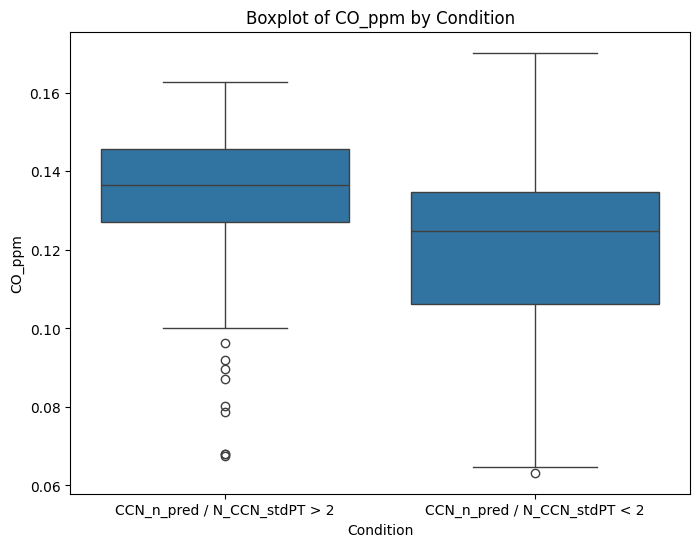

In [9]:
# Assuming 'd' is your DataFrame

# Create two subsets based on the conditions
subset1 = d[d['CCN_n_pred'] / d['N_CCN_stdPT'] > 2]['CO_ppm']
subset2 = d[d['CCN_n_pred'] / d['N_CCN_stdPT'] < 2]['CO_ppm']

# Combine the subsets into a single DataFrame for plotting
data = pd.DataFrame({
    'CO_ppm': pd.concat([subset1, subset2]),
    'Condition': ['CCN_n_pred / N_CCN_stdPT > 2'] * len(subset1) + ['CCN_n_pred / N_CCN_stdPT < 2'] * len(subset2)
})

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Condition', y='CO_ppm', data=data)
plt.title('Boxplot of CO_ppm by Condition')
plt.xlabel('Condition')
plt.ylabel('CO_ppm')
plt.show()